  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

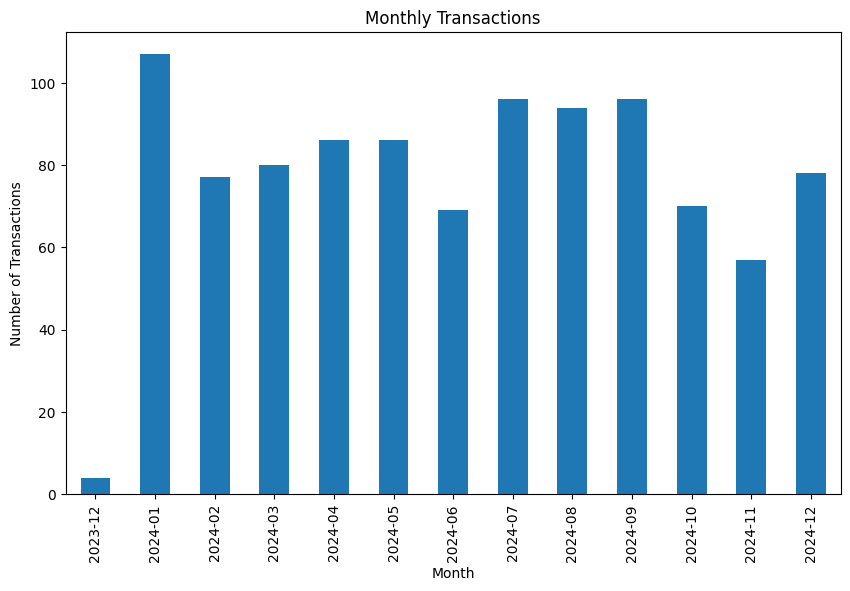

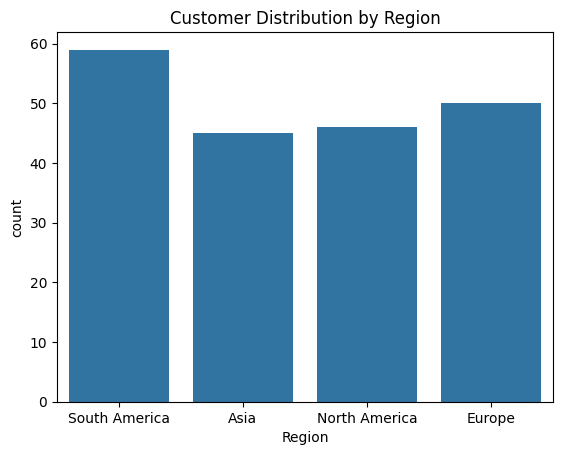

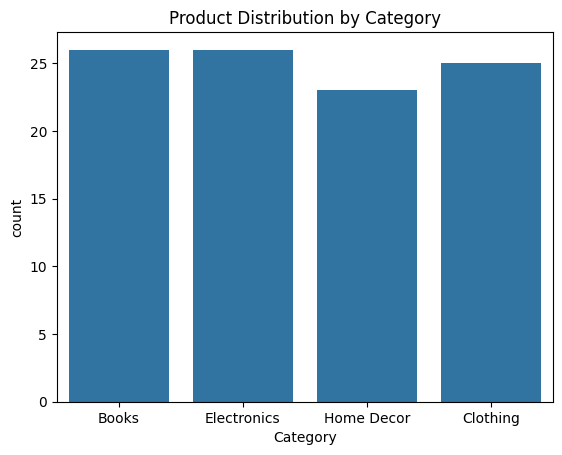

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Basic EDA
print(customers.head())
print(products.head())
print(transactions.head(),"\n")

# Check for missing values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum(),"\n")

# Check for duplicates
print(customers.duplicated().sum())
print(products.duplicated().sum())
print(transactions.duplicated().sum(),"\n")

# Remove duplicates
customers = customers.drop_duplicates()
products = products.drop_duplicates()
transactions = transactions.drop_duplicates()

# Summary statistics for numeric data
print(customers.describe())
print(products.describe())
print(transactions.describe(),"\n")

# Value counts for categorical data
print(customers['Region'].value_counts())
print(products['Category'].value_counts())
print(transactions['ProductID'].value_counts(),"\n")

# Convert to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Extract year and month
customers['SignupYear'] = customers['SignupDate'].dt.year
transactions['TransactionMonth'] = transactions['TransactionDate'].dt.month
transactions['YearMonth'] = transactions['TransactionDate'].dt.to_period('M')

# Sum quantities for each product
product_purchases = transactions.groupby('ProductID')['Quantity'].sum().reset_index()

# Rename columns for clarity
product_purchases = product_purchases.rename(columns={'Quantity': 'TotalPurchases'})

# Sort by total purchases in descending order
product_purchases = product_purchases.sort_values(by='TotalPurchases', ascending=False)

# Merge with Products dataset to get product details
most_purchased_product = product_purchases.merge(products, on='ProductID').iloc[0]

# Print the most purchased product
print("\nMost Purchased Product:")
print(f"Product ID: {most_purchased_product['ProductID']}")
print(f"Product Name: {most_purchased_product['ProductName']}")
print(f"Category: {most_purchased_product['Category']}")
print(f"Total Purchases: {most_purchased_product['TotalPurchases']}")

# Group by YearMonth and calculate total sales
monthly_sales = transactions.groupby('YearMonth')['TotalValue'].sum().reset_index()

# Rename columns for clarity
monthly_sales = monthly_sales.rename(columns={'TotalValue': 'TotalSales'})

# Find the month with the highest sales
highest_sales_month = monthly_sales.loc[monthly_sales['TotalSales'].idxmax()]

# Print the result
print("\nMonth with the Highest Sales:")
print(f"  Month: {highest_sales_month['YearMonth']}")
print(f"  Total Sales: ${highest_sales_month['TotalSales']:.2f}")

# Count customers by region
region_counts = customers['Region'].value_counts().reset_index()

# Rename columns for clarity
region_counts.columns = ['Region', 'CustomerCount']

# Get the region with the highest customer count
region_with_highest_customers = region_counts.iloc[0]

# Print the result
print("\nRegion with the Highest Number of Customers:")
print(f"  Region: {region_with_highest_customers['Region']}")
print(f"  Number of Customers: {region_with_highest_customers['CustomerCount']}")

# Merge transactions with products on ProductID to get Category
transactions = transactions.merge(products, on="ProductID", how="left")
# Group by category and calculate total sales
transactions['TotalSales'] = transactions['Quantity'] * transactions['Price_x']
# Group by Category and calculate total sales
category_sales = transactions.groupby('Category')['TotalSales'].sum().reset_index()
# Find the category with the most sales
most_sales_category = category_sales.loc[category_sales['TotalSales'].idxmax()]

# Print the result
print("\nCategory with the Most Sales:")
print(f"  Category: {most_sales_category['Category']}")
print(f"  Total Sales: ${most_sales_category['TotalSales']:.2f}")

# Visualize transaction distribution over time
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['Month'] = transactions['TransactionDate'].dt.to_period('M')
monthly_transactions = transactions.groupby('Month').size()
plt.figure(figsize=(10, 6))
monthly_transactions.plot(kind='bar')
plt.title('Monthly Transactions')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.show()

# Visualize customer regions
sns.countplot(data=customers, x='Region')
plt.title("Customer Distribution by Region")
plt.show()

# Visualize product categories
sns.countplot(data=products, x='Category')
plt.title("Product Distribution by Category")
plt.show()